<a href="https://colab.research.google.com/github/0902338471/Coder_School_Assigment/blob/master/Copie_de_Assignment_3_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://i.imgur.com/0AUxkXt.png)

# Assignment 3 - From data to insights

Before you explore the data, write down a short list of what you expect to see in the data: the distribution of key variables, the relationships between important pairs of them, and so on. Such a list is essentially a prediction based on your current understanding of the business.

Now analyze the data. Make plots, do summaries, whatever is needed to see if it matches your expectations.

Is there anything that doesn’t match? Anything that makes you go “That’s odd” or “That doesn’t make any sense.”?

Zoom in and try to understand what in your business is making that weird thing show up in the data like that. This is the critical step.

You may have just found an insight into the business and increased your understanding


## The data analysis checklist

This checklist can be used as a guide during the process of a data analysis, or as a way to evaluate the quality of a reported data analysis.

### Answering the first questions

1. Did you define the metric for success before beginning?
2. Did you understand the context for the question and business application?
3. Did you consider whether the question could be answered with the available data?

### Cleaning the data

1. Did you identify the missing data?
2. Is each variable one column?
3. Do different data types appear in each table?
4. Did you try to identify any errors or miscoding of variables?
5. Did you check for outliers?

### Exploratory analysis

1. Did you make univariate plots (histogram, distplot, boxplot)?
2. Did you consider correlations between variables (scatterplot, jointplot, kde plot, correlation matrix)?
3. Did you check the units of all data points to make sure they are in the right range?

### Presentations

1. Did you lead with a brief, understandable to everyone of your problem?
2. Did you explain the data, describe the question of interest?
3. Did you make sure all legends and axes were legible from the back of the room?

## Dataset - Online Retailes Purchase

Typically e-commerce datasets are proprietary and consequently hard to find among publicly available data. However, [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php) has made this dataset containing actual transactions from 2010 and 2011. The dataset is maintained on their site, where it can be found by the title "Online Retail".


### Step 1 - Checking the data

**Import tools set**

In [0]:
#importing necessary library
import pandas as pd
import numpy as np
import seaborn as sns

**Import data**

In [0]:
link = "https://ml101-khanhnguyen.s3-ap-southeast-1.amazonaws.com/devc/Online_Retail.csv"
# Note: set param encoding = 'latin1'
#loading dataset
retail=pd.read_csv(link,encoding='latin1')

In [5]:
# Print out First 5 rows from dataframe
# get top 5 rows from dataframe
retail.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [6]:
#Information about the datasets
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Step 2 - Cleaning the data

Few of useful data cleaning functions:

* `s.astype('category')` # This will convert the datatype of the series to float *Please note that "s" here is a Pandas Series

* `s.replace(1,'one')` # This will replace all values equal to 1 with 'one'

* `s.replace([1,3],['one','three'])` # This will replace all 1 with 'one' and 3 with 'three'

* `data.rename(columns=lambda x: x + 1)` # Mass renaming of columns

* `data.rename(columns={'oldname': 'new name'})` # Selective renaming

* `data.set_index('column_one')` #  This will change the index

* `data.rename(index=lambda x: x + 1)` # Mass renaming of index

* `data.dropna()` # Remove missing values

* `data.fillna(x)` #  This will replaces all null values with x

* `s.fillna(s.mean())` # This will replace all null values with the mean (mean can be replaced with almost any function from the below section) :

* `data.corr()` # This will return the correlation between columns in a DataFrame

* `data.count()` # This will return the number of non-null values in each DataFrame column

* `data.max()` # This will return the highest value in each column

* `data.min()` # This will return the lowest value in each column

* `data.median()` # This will return the median of each column

* `data.std()` # This will returns the standard deviation of each column


**Check for NaN values**

In [7]:
#Checking whether dataset contains NaN values and where does it exist?
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

**The cell above show us that there are no NaN values in our dataset's column except column Description and CustomerID**

**Examine few examples of NaN values**

In [8]:
# List all rows that have NaN values either in CustomerID or Description column
retail[(retail['Description'].isnull())|(retail['CustomerID'].isnull())]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/10 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/10 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/10 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/10 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/10 14:32,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,12/1/10 14:32,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,12/1/10 14:32,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,12/1/10 14:32,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,12/1/10 14:32,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,12/1/10 14:32,0.43,NaN,United Kingdom


**Exclude negative Quatity entries**

In [9]:
#Excluding negative Quantity entries by filtering rows which has non-negative Quantity entries
retailPosQuantity=retail[retail['Quantity']>=0]
#print it out
retailPosQuantity

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/10 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/10 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/10 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/10 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/10 8:34,1.69,13047.0,United Kingdom


**Exclude negative Price entries**

In [10]:
#Excluding negative Price entries by filtering those rows which have non-negative Price value
retailPosPrice=retail[retail['UnitPrice']>=0]
retailPosPrice


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/10 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/10 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/10 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/10 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/10 8:34,1.69,13047.0,United Kingdom


### Step 3 - EDA

**The customer with the highest number of orders comes from the United Kingdom (UK)**

In [11]:
#First select those customers who comes from the UK
retailUK=retail[retail['Country']=='United Kingdom']
#group customers by customerID
groupCustomer=retailUK.groupby('CustomerID')
#get total orders of each Customer and sort it in descending order then assign the index of the max one to maxCusID variable
maxCusID=groupCustomer['InvoiceNo'].nunique().sort_values(ascending=False).head(1).index
#print all information about the customer with the highest number of orders comes from the United Kingdom (UK)
retail[retail['CustomerID']==maxCusID[0]]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1016,536521,22854,CREAM SWEETHEART EGG HOLDER,1,12/1/10 12:48,4.95,12748.0,United Kingdom
3692,536641,22187,GREEN CHRISTMAS TREE CARD HOLDER,1,12/2/10 11:46,4.25,12748.0,United Kingdom
8448,537136,20894,HANGING BAUBLE T-LIGHT HOLDER LARGE,1,12/5/10 12:42,2.95,12748.0,United Kingdom
8449,537136,85018D,YULETIDE IMAGES S/6 PAPER BOXES,1,12/5/10 12:42,2.55,12748.0,United Kingdom
8450,537136,21413,PERIWINKLE T-LIGHT HOLDER,1,12/5/10 12:42,1.25,12748.0,United Kingdom
8451,537136,79149B,SILICON STAR BULB BLUE,1,12/5/10 12:42,0.42,12748.0,United Kingdom
8452,537136,21682,LARGE MEDINA STAMPED METAL BOWL,4,12/5/10 12:42,4.95,12748.0,United Kingdom
8453,537136,78034B,BLUE NETTING STORAGE HANGER,1,12/5/10 12:42,1.95,12748.0,United Kingdom
8454,537136,22894,TABLECLOTH RED APPLES DESIGN,1,12/5/10 12:42,8.50,12748.0,United Kingdom
8455,537136,79151B,"SILICON CUBE 25W, BLUE",1,12/5/10 12:42,0.42,12748.0,United Kingdom


**The customer with the highest money spent on purchases comes from Netherlands**

In [12]:
#filtering customer from Netherlands
retailNetherlands=retail[retail['Country']=='Netherlands']
#adding column total money spent on one purchase =UnitPrice *Quantity
retailNetherlands['TotalPrice']=retailNetherlands['UnitPrice']*retailNetherlands['Quantity']
#group customer in Netherlands
NetherlandsGroup=retailNetherlands.groupby('CustomerID')
#summing total prices spent on all purchases of one customer
totalSpentNethGroup=NetherlandsGroup.agg(np.sum)['TotalPrice']
#sorting it in descending order and get the max
maxSpentMoneyCusID=totalSpentNethGroup.sort_values(ascending=False).head(1).index
print("Customer ID with the highest money spent on purchases comes from Netherlands is:"+str(maxSpentMoneyCusID[0]))


Customer ID with the highest money spent on purchases comes from Netherlands is:14646.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


**On which year had the highest sales?**

In [15]:
#checking whether the displayed InvoiceDate is formatted as dd/mm/yy or mm/dd/yy
retail['InvoiceDate'].sample(10)

2687       12/1/10 17:06
199123     5/22/11 11:52
67349      1/21/11 17:09
211020      6/2/11 11:33
179032      5/8/11 11:13
489046    11/22/11 11:37
327477       9/6/11 9:34
452808     11/9/11 15:42
139693     3/30/11 14:06
259670      7/12/11 9:04
Name: InvoiceDate, dtype: object

**The formatted InvoiceDate follows mm/dd/yy format**

In [41]:
#function for extracting year from given mm/dd/yy format string
def extractyear( invoicedate):
  #split the string into date ,month,year and time then get the first group of the list which represent for mm/dd/yy
  MDYearFormat=invoicedate.split()[0]
  #get the last two character which represent for year
  year=MDYearFormat[-2:]
  return year
#adding ToTalPrice=UnitPrice*Quantity to retail dataframe
retail['TotalPrice']=retail['UnitPrice']*retail['Quantity']
#extracting year from invoice Date and adding one more column called Year by applying function extractyear
retail['Year']=retail['InvoiceDate'].apply(extractyear)
#group retail by year and summing all of TotalPrice sales of that year and sort it 
TotalPriceYear=retail.groupby(by=['Year'])['TotalPrice'].agg(np.sum).sort_values(ascending=False)
#get the highest sales Year
highestSaleYear=TotalPriceYear.head(1).index
print("Year 20"+str(highestSaleYear[0])+" has the highest sales")

Year 2011 has the highest sales


**How many orders (per hour)?**

In [51]:
#function for extracting hour
def extracthour(tmp):
  time=tmp.split()[1]
  return time[-5:-3]
#applying above funtion to add one more column Hour into retail DataFrame
retail['Hour']=retail['InvoiceDate'].apply(extracthour)
#group retail by hour
retailHour=retail.groupby('Hour')
#counting unique order per hour
retailHourOrders=retailHour['InvoiceNo'].nunique()
print(retailHourOrders)

Hour
10    2961
11    3165
12    3962
13    3369
14    3137
15    3069
16    1952
17    1205
18     333
19     219
20      28
6       22
7       31
8      624
9     1824
Name: InvoiceNo, dtype: int64


**Make a plot about number of orders per hour**

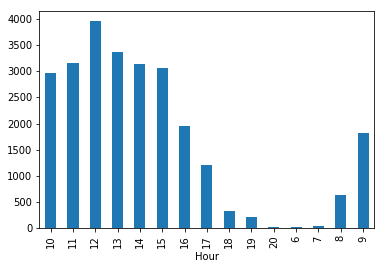

In [52]:
retailHourOrders.plot(kind='bar')

**How many orders (per month)?**

In [65]:
#function to extract month from mm/dd/yy formatted string
def extractmonth(tmp):
  MDY=tmp.split()[0]
  if(MDY[2]=='/'):
    return MDY[:2]
  else:
    return MDY[:1]
#adding month column to retail DataFrame by applying above function
retail['Month']=retail['InvoiceDate'].apply(extractmonth)
#group retail by month
retailMonth=retail.groupby(by='Month')
#counting number of orders per month
retailMonthOrders=retailMonth['InvoiceNo'].nunique()
retailMonthOrders

Month
1     1476
10    2637
11    3462
12    3040
2     1393
3     1983
4     1744
5     2162
6     2012
7     1927
8     1737
9     2327
Name: InvoiceNo, dtype: int64

**Make a plot about number of orders per month**

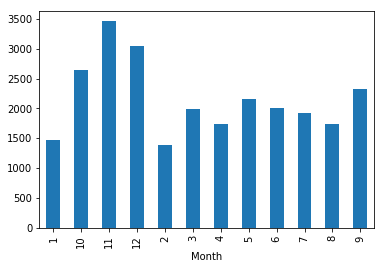

In [66]:
retailMonthOrders.plot(kind='bar')

**Top 10 items most sales**

In [74]:
#group by Item name and summing totalPay for that item
retailItem=retail.groupby('Description').agg(np.sum).reset_index()
#getting Description and TotalPrice column
retailItem=retailItem[['Description','TotalPrice']]
#sort by TotalPrice
retailItem=retailItem.sort_values(by=['TotalPrice'],ascending=False)
#get top 10 items
retailItem.head(10)

,Description,TotalPrice
1098,DOTCOM POSTAGE,206245.48
2915,REGENCY CAKESTAND 3 TIER,164762.19
3918,WHITE HANGING HEART T-LIGHT HOLDER,99668.47
2471,PARTY BUNTING,98302.98
1866,JUMBO BAG RED RETROSPOT,92356.03
2803,RABBIT NIGHT LIGHT,66756.59
2753,POSTAGE,66230.64
2439,PAPER CHAIN KIT 50'S CHRISTMAS,63791.94
244,ASSORTED COLOUR BIRD ORNAMENT,58959.73
773,CHILLI LIGHTS,53768.06


**Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK**

                 Country  Quantity
0              Australia     83653
1                Austria      4827
2                Bahrain       260
3                Belgium     23152
4                 Brazil       356
5                 Canada      2763
6        Channel Islands      9479
7                 Cyprus      6317
8         Czech Republic       592
9                Denmark      8188
10                  EIRE    142637
11    European Community       497
12               Finland     10666
13                France    110480
14               Germany    117448
15                Greece      1556
16             Hong Kong      4769
17               Iceland      2458
18                Israel      4353
19                 Italy      7999
20                 Japan     25218
21               Lebanon       386
22             Lithuania       652
23                 Malta       944
24           Netherlands    200128
25                Norway     19247
26                Poland      3653
27              Port

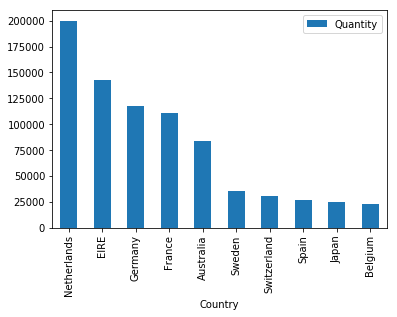

In [100]:
#eliminating retail involving UK
retailNotUK=retail[retail['Country']!='United Kingdom']
#group by country and summing all Quantity of that country
retailNotUKCountry=retailNotUK.groupby('Country').agg(np.sum).reset_index()[['Country','Quantity']]
print(retailNotUKCountry)
#sort by Quantity
retailNotUKCountry=retailNotUKCountry.sort_values(by='Quantity',ascending=False)
#get top 10 countries
top10QuantityCountry=retailNotUKCountry.head(10)
print("Top 10 Country:",top10QuantityCountry)
#creating histogram
top10QuantityCountry.plot(x='Country',kind='bar')

### You are awesome!!